In [1]:
import re
import pandas as pd
import numpy as np
import seaborn as sns
import datetime
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df = pd.read_csv('DSI_kickstarterscrape_dataset.csv')
df.head(1)

,project id,name,url,category,subcategory,location,status,goal,pledged,funded percentage,backers,funded date,levels,reward levels,updates,comments,duration
0,39409,WHILE THE TREES SLEEP,http://www.kickstarter.com/projects/emiliesaba...,Film & Video,Short Film,"Columbia, MO",successful,10500.0,11545.0,1.099524,66,"Fri, 19 Aug 2011 19:28:17 -0000",7,"$25,$50,$100,$250,$500,$1,000,$2,500",10,2,30.0


In [3]:
df.shape

(45957, 17)

In [4]:
df.status.value_counts()

successful    22969
failed        18996
live           3929
canceled         59
suspended         4
Name: status, dtype: int64

In [5]:
# Drop status rows labeled as live, canceled, suspended.

df = df[~df['status'].isin(['live', 'canceled', 'suspended'])]

In [6]:
# Replace space in clomun with underscore.
df.columns = df.columns.str.replace(' ', '_')

In [7]:
df.shape

(41965, 17)

In [8]:
# Split up the date to day, time, year, and month.

df['funded_day'] = df.funded_date.apply(lambda x: x.split(',')[0])

In [9]:
df['funded_date'] = pd.to_datetime(df['funded_date'])
df['funded_time'] = [d.time() for d in df['funded_date']]
df['funded_Newdate'] = [d.date() for d in df['funded_date']]

In [10]:
# Convert to String and then to int

df['funded_year'] = df['funded_Newdate'].apply(lambda date: str(date).split('-')[0]).astype(str).astype(int)
df['funded_month'] = df['funded_Newdate'].apply(lambda date: str(date).split('-')[1]).astype(str).astype(int)
df['day_of_month'] = df['funded_Newdate'].apply(lambda date: str(date).split('-')[2]).astype(str).astype(int)

In [11]:
df.head(2)

,project_id,name,url,category,subcategory,location,status,goal,pledged,funded_percentage,...,reward_levels,updates,comments,duration,funded_day,funded_time,funded_Newdate,funded_year,funded_month,day_of_month
0,39409,WHILE THE TREES SLEEP,http://www.kickstarter.com/projects/emiliesaba...,Film & Video,Short Film,"Columbia, MO",successful,10500.0,11545.0,1.099524,...,"$25,$50,$100,$250,$500,$1,000,$2,500",10,2,30.00,Fri,19:28:17,2011-08-19,2011,8,19
1,126581,Educational Online Trading Card Game,http://www.kickstarter.com/projects/972789543/...,Games,Board & Card Games,"Maplewood, NJ",failed,4000.0,20.0,0.005000,...,"$1,$5,$10,$25,$50",6,0,47.18,Mon,03:59:00,2010-08-02,2010,8,2


In [12]:
df.shape

(41965, 23)

In [13]:
# Drop irrelevant columns.

df.drop(['name', 'url', 'reward_levels' ], axis = 1, inplace = True)
df.head()

,project_id,category,subcategory,location,status,goal,pledged,funded_percentage,backers,funded_date,levels,updates,comments,duration,funded_day,funded_time,funded_Newdate,funded_year,funded_month,day_of_month
0,39409,Film & Video,Short Film,"Columbia, MO",successful,10500.0,11545.0,1.099524,66,2011-08-19 19:28:17,7,10,2,30.00,Fri,19:28:17,2011-08-19,2011,8,19
1,126581,Games,Board & Card Games,"Maplewood, NJ",failed,4000.0,20.0,0.005000,2,2010-08-02 03:59:00,5,6,0,47.18,Mon,03:59:00,2010-08-02,2010,8,2
3,237090,Film & Video,Documentary,"Los Angeles, CA",successful,6000.0,6535.0,1.089167,100,2012-04-08 02:14:00,13,4,0,32.22,Sun,02:14:00,2012-04-08,2012,4,8
4,246101,Fashion,Fashion,"Novi, MI",failed,3500.0,0.0,0.000000,0,2011-06-01 15:25:39,6,2,0,30.00,Wed,15:25:39,2011-06-01,2011,6,1
5,316217,Film & Video,Short Film,"Portland, OR",successful,3500.0,3582.0,1.023331,39,2011-06-22 13:33:00,7,8,0,21.43,Wed,13:33:00,2011-06-22,2011,6,22


In [14]:
# Drop NaN values

df.dropna(inplace = True)

In [15]:
# Drop a particular row because it location is unavailable.

df.drop([7762], inplace = True)

In [16]:
df.head()

,project_id,category,subcategory,location,status,goal,pledged,funded_percentage,backers,funded_date,levels,updates,comments,duration,funded_day,funded_time,funded_Newdate,funded_year,funded_month,day_of_month
0,39409,Film & Video,Short Film,"Columbia, MO",successful,10500.0,11545.0,1.099524,66,2011-08-19 19:28:17,7,10,2,30.00,Fri,19:28:17,2011-08-19,2011,8,19
1,126581,Games,Board & Card Games,"Maplewood, NJ",failed,4000.0,20.0,0.005000,2,2010-08-02 03:59:00,5,6,0,47.18,Mon,03:59:00,2010-08-02,2010,8,2
3,237090,Film & Video,Documentary,"Los Angeles, CA",successful,6000.0,6535.0,1.089167,100,2012-04-08 02:14:00,13,4,0,32.22,Sun,02:14:00,2012-04-08,2012,4,8
4,246101,Fashion,Fashion,"Novi, MI",failed,3500.0,0.0,0.000000,0,2011-06-01 15:25:39,6,2,0,30.00,Wed,15:25:39,2011-06-01,2011,6,1
5,316217,Film & Video,Short Film,"Portland, OR",successful,3500.0,3582.0,1.023331,39,2011-06-22 13:33:00,7,8,0,21.43,Wed,13:33:00,2011-06-22,2011,6,22


In [17]:
# Split up City and States because some of them contain State and Country.

df['city'] = df.location.apply(lambda x: x.split(',')[0])
df['state'] = df.location.apply(lambda x: x.split(',')[1])

In [18]:
df.head()

,project_id,category,subcategory,location,status,goal,pledged,funded_percentage,backers,funded_date,...,comments,duration,funded_day,funded_time,funded_Newdate,funded_year,funded_month,day_of_month,city,state
0,39409,Film & Video,Short Film,"Columbia, MO",successful,10500.0,11545.0,1.099524,66,2011-08-19 19:28:17,...,2,30.00,Fri,19:28:17,2011-08-19,2011,8,19,Columbia,MO
1,126581,Games,Board & Card Games,"Maplewood, NJ",failed,4000.0,20.0,0.005000,2,2010-08-02 03:59:00,...,0,47.18,Mon,03:59:00,2010-08-02,2010,8,2,Maplewood,NJ
3,237090,Film & Video,Documentary,"Los Angeles, CA",successful,6000.0,6535.0,1.089167,100,2012-04-08 02:14:00,...,0,32.22,Sun,02:14:00,2012-04-08,2012,4,8,Los Angeles,CA
4,246101,Fashion,Fashion,"Novi, MI",failed,3500.0,0.0,0.000000,0,2011-06-01 15:25:39,...,0,30.00,Wed,15:25:39,2011-06-01,2011,6,1,Novi,MI
5,316217,Film & Video,Short Film,"Portland, OR",successful,3500.0,3582.0,1.023331,39,2011-06-22 13:33:00,...,0,21.43,Wed,13:33:00,2011-06-22,2011,6,22,Portland,OR


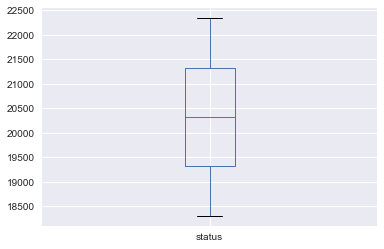

In [19]:
df.status.value_counts().plot(kind = 'box')  #successful : 22337   failed: 18304

In [20]:
# Split up States and create a new column for that.

def split_it(state):
     return re.findall('([A-Z]{2,})', state)

df['STATE'] = df['state'].apply(split_it)

In [21]:
def split_it(state):
     return re.findall('[A-Z][a-z]+', state)

df['Country'] = df['state'].apply(split_it)

In [22]:
# Remove [] in STATE Column and Country

df['STATE'] = df['STATE'].str[0]
df['Country'] = df['Country'].str[0]

In [23]:
# Fill in NaN values for Country (United State)
df.Country.fillna(value = 'United States', inplace = True)

In [24]:
# Assigning country names using country listed in state column
df.loc[df.Country == 'United', 'Country'] = df.loc[df.Country == 'United', 'state']
df.loc[df.Country == 'South', 'Country'] = df.loc[df.Country == 'South', 'state']
df.loc[df.Country == 'Saint', 'Country'] = df.loc[df.Country == 'Saint', 'state']
df.loc[df.Country == 'Saudi', 'Country'] = df.loc[df.Country == 'Saudi', 'state']
df.loc[df.Country == 'Mt', 'Country'] = df.loc[df.Country == 'Mt', 'state']
df.loc[df.Country == 'Viet', 'Country'] = df.loc[df.Country == 'Viet', 'state']
df.loc[df.Country == 'Kyoto', 'Country'] = df.loc[df.Country == 'Kyoto', 'state']
df.loc[df.Country == 'Sri', 'Country'] = df.loc[df.Country == 'Sri', 'state']
df.loc[df.Country == 'Sierra', 'Country'] = df.loc[df.Country == 'Sierra', 'state']
df.loc[df.Country == 'Isle', 'Country'] = df.loc[df.Country == 'Isle', 'state']
df.loc[df.Country == 'Central', 'Country'] = df.loc[df.Country == 'Central', 'state']
df.loc[df.Country == 'Argent', 'Country'] = df.loc[df.Country == 'Argent', 'state']
df.loc[df.Country == 'El', 'Country'] = df.loc[df.Country == 'El', 'state']
df.loc[df.Country == 'Costa', 'Country'] = df.loc[df.Country == 'Costa', 'state']
df.loc[df.Country == 'Svalbard', 'Country'] = df.loc[df.Country == 'Svalbard', 'state']
df.loc[df.Country == 'Virgin', 'Country'] = df.loc[df.Country == 'Virgin', 'state']
df.loc[df.Country == 'Czech', 'Country'] = df.loc[df.Country == 'Czech', 'state']
df.loc[df.Country == 'New', 'Country'] = df.loc[df.Country == 'New', 'state']
df.loc[df.Country == 'Hong', 'Country'] = df.loc[df.Country == 'Hong', 'state']
df.loc[df.Country == 'Argentinaina', 'Country'] = df.loc[df.Country == 'Argentinaina', 'state']
df.loc[df.Country == 'Puerto', 'Country'] = df.loc[df.Country == 'Puerto', 'state']
df.loc[df.Country == 'Papua', 'Country'] = df.loc[df.Country == 'Papua', 'state']
df.loc[df.Country == 'Dominican', 'Country'] = df.loc[df.Country == 'Dominican', 'state']
df.loc[df.Country == 'Falkland', 'Country'] = df.loc[df.Country == 'Falkland', 'state']
df.loc[df.Country == 'Palestinian', 'Country'] = df.loc[df.Country == 'Palestinian', 'state']
df.loc[df.Country == 'Palestinian', 'Country'] = df.loc[df.Country == 'Palestinian', 'state']
df.loc[df.Country == 'Libyan', 'Country'] = df.loc[df.Country == 'Libyan', 'state']
df.loc[df.Country == 'Syrian', 'Country'] = df.loc[df.Country == 'Syrian', 'state']

In [25]:
# Rename Countries
df.Country = df.Country.str.replace('Mt', 'United States ')
df.Country = df.Country.str.replace('Kyoto', 'Japan')
df.Country = df.Country.str.replace('Argent', 'Argentina')
df.Country = df.Country.str.replace('Argentinaina', 'Argentina')
df.Country = df.Country.str.replace('Dominican Re', 'Dominican Republic')
df.Country = df.Country.str.replace('Congo', 'DR Congo')


In [26]:
# Rename City
df.city = df.city.str.replace('Ciudad Aut���_noma De Buenos Aires', 'Buenos Aires')
df.city = df.city.str.replace('Lim���_n', 'Lima')
df.city = df.city.str.replace('Panam��΍', 'San Jose')
df.city = df.city.str.replace('H�Ċܢibiny, ', 'Hradec Králové')

In [27]:
# Replace the space infront of the changed countries.
#df.Country = df.Country.str[].replace(' ', '')

In [28]:
df.head(5)

,project_id,category,subcategory,location,status,goal,pledged,funded_percentage,backers,funded_date,...,funded_day,funded_time,funded_Newdate,funded_year,funded_month,day_of_month,city,state,STATE,Country
0,39409,Film & Video,Short Film,"Columbia, MO",successful,10500.0,11545.0,1.099524,66,2011-08-19 19:28:17,...,Fri,19:28:17,2011-08-19,2011,8,19,Columbia,MO,MO,United States
1,126581,Games,Board & Card Games,"Maplewood, NJ",failed,4000.0,20.0,0.005000,2,2010-08-02 03:59:00,...,Mon,03:59:00,2010-08-02,2010,8,2,Maplewood,NJ,NJ,United States
3,237090,Film & Video,Documentary,"Los Angeles, CA",successful,6000.0,6535.0,1.089167,100,2012-04-08 02:14:00,...,Sun,02:14:00,2012-04-08,2012,4,8,Los Angeles,CA,CA,United States
4,246101,Fashion,Fashion,"Novi, MI",failed,3500.0,0.0,0.000000,0,2011-06-01 15:25:39,...,Wed,15:25:39,2011-06-01,2011,6,1,Novi,MI,MI,United States
5,316217,Film & Video,Short Film,"Portland, OR",successful,3500.0,3582.0,1.023331,39,2011-06-22 13:33:00,...,Wed,13:33:00,2011-06-22,2011,6,22,Portland,OR,OR,United States


In [29]:
df.drop(['state', 'location', 'funded_date', 'funded_time', 'funded_year', 'funded_Newdate'], axis =1, inplace = True)

In [30]:
df.head()

,project_id,category,subcategory,status,goal,pledged,funded_percentage,backers,levels,updates,comments,duration,funded_day,funded_month,day_of_month,city,STATE,Country
0,39409,Film & Video,Short Film,successful,10500.0,11545.0,1.099524,66,7,10,2,30.00,Fri,8,19,Columbia,MO,United States
1,126581,Games,Board & Card Games,failed,4000.0,20.0,0.005000,2,5,6,0,47.18,Mon,8,2,Maplewood,NJ,United States
3,237090,Film & Video,Documentary,successful,6000.0,6535.0,1.089167,100,13,4,0,32.22,Sun,4,8,Los Angeles,CA,United States
4,246101,Fashion,Fashion,failed,3500.0,0.0,0.000000,0,6,2,0,30.00,Wed,6,1,Novi,MI,United States
5,316217,Film & Video,Short Film,successful,3500.0,3582.0,1.023331,39,7,8,0,21.43,Wed,6,22,Portland,OR,United States


In [31]:
#bins = (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)
#group_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'July', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
#categories = pd.cut(df.funded_month, bins, labels=group_names)
#df.funded_month = categories

In [32]:
# df.to_csv('cleaned_kickstarter.csv', index = False)

In [33]:
df['status'] = df.status.str.contains('successful').astype(int)

In [34]:
df.rename(columns={'STATE':'state'}, inplace =True)

In [35]:
df.head(2)

,project_id,category,subcategory,status,goal,pledged,funded_percentage,backers,levels,updates,comments,duration,funded_day,funded_month,day_of_month,city,state,Country
0,39409,Film & Video,Short Film,1,10500.0,11545.0,1.099524,66,7,10,2,30.00,Fri,8,19,Columbia,MO,United States
1,126581,Games,Board & Card Games,0,4000.0,20.0,0.005000,2,5,6,0,47.18,Mon,8,2,Maplewood,NJ,United States


In [36]:
def classifier(row):
    if row.Country in ['United States', 'Canada', 'Guatemala', 'Mexico', 'Puerto Rico', 'Nicaragua', 'El Salvador', 'Panama', 'Bolivia', 'Middleburg', 'Guam']:
        return 'America'
    elif row.Country in ['Nigeria', 'Ghana', 'South Africa', 'Kenya', 'Ethiopia', 'DR Congo', 'Morocco', 'Tanzania', 'Zambia', 'Liberia', 'Rwanda', 'Mali', 'Cameroon', 'Namibia', 'Zimbabwe', 'Tunisia', 'Sierra Leone', 'Central African Republic', 'Uganda', 'Sudan', 'Senegal', 'Malawi', 'Mozambique', 'Libyan Arab Jamahiriya', 'Guinea', 'Swaziland']:
        return 'Africa'
    elif row.Country in ['United Kingdom', 'Norway', 'Germany', 'Sweden', 'Bosnia', 'Iceland', 'Hungary', 'Italy', 'Netherlands','France', 'United Kingdom', 'Austria',
       'Turkey','Finland', 'Czech Republic','Armenia', 'Portugal','Denmark','Switzerland', 'Svalbard and Jan Mayen', 'Russia', 'Ukraine', 'Bulgaria','Spain','Poland', 'Georgia','Ireland','Greece','Serbia','Slovenia','Belgium','Greenland','Romania','Lithuania', 'Micronesia','Estonia','Cyprus', 'Macedonia','Kyrgyzstan',]:
        return 'Europe'
    elif row.Country in ['Jamaica', 'Haiti','Bahamas','Dominican Republic','Saint Lucia', 'Dominican Republicpublic', 'Trinidad']:
        return 'Carribean'
    elif row.Country in ['China', 'Taiwan', 'Hong Kong', 'Nepal', 'Indonesia', 'Singapore', 'India', 'Japan', 'Lebanon', 'Kazakhstan', 'South Korea', 'Philippines', 'Cambodia', 'Thailand','Malaysia','Bhutan','Sri Lanka','Bermuda','Viet Nam','Bangladesh', 'Laos','Guam']:
        return 'Asia'
    elif row.Country in ['Israel','Qatar', 'Afghanistan','Kazakhstan','United Arab Emirates','Palestinian Territories','Syrian Arab Republic','Saudi Arabia', 'Iraq','Iran','Tajikistan',]:
        return 'Arab'
    else:
        return "Oceania"   
df["continent"] = df.apply(classifier, axis=1)

In [37]:
df.head()

,project_id,category,subcategory,status,goal,pledged,funded_percentage,backers,levels,updates,comments,duration,funded_day,funded_month,day_of_month,city,state,Country,continent
0,39409,Film & Video,Short Film,1,10500.0,11545.0,1.099524,66,7,10,2,30.00,Fri,8,19,Columbia,MO,United States,America
1,126581,Games,Board & Card Games,0,4000.0,20.0,0.005000,2,5,6,0,47.18,Mon,8,2,Maplewood,NJ,United States,America
3,237090,Film & Video,Documentary,1,6000.0,6535.0,1.089167,100,13,4,0,32.22,Sun,4,8,Los Angeles,CA,United States,America
4,246101,Fashion,Fashion,0,3500.0,0.0,0.000000,0,6,2,0,30.00,Wed,6,1,Novi,MI,United States,America
5,316217,Film & Video,Short Film,1,3500.0,3582.0,1.023331,39,7,8,0,21.43,Wed,6,22,Portland,OR,United States,America


In [38]:
df.rename(columns = {'Country': 'country'}, inplace = True)

In [39]:
from sklearn import preprocessing
def encode_features(df):
    features = ['category', 'status', 'subcategory', 'state', 'pledged', 'backers', 'duration', 'funded_month', 'city', 'country', 'continent']
    df_combined = pd.concat([df])
    
    for feature in features:
        le = preprocessing.LabelEncoder()
        le = le.fit(df_combined[feature])
        df[feature] = le.transform(df[feature])
    return df
    
data = encode_features(df)
data.head()

/Users/Bolito/anaconda2/lib/python2.7/site-packages/numpy/lib/arraysetops.py:216: FutureWarning: numpy not_equal will not check object identity in the future. The comparison did not return the same result as suggested by the identity (`is`)) and will change.
  flag = np.concatenate(([True], aux[1:] != aux[:-1]))
/Users/Bolito/anaconda2/lib/python2.7/site-packages/numpy/lib/arraysetops.py:275: FutureWarning: numpy equal will not check object identity in the future. The comparison did not return the same result as suggested by the identity (`is`)) and will change.
  return aux[:-1][aux[1:] == aux[:-1]]


,project_id,category,subcategory,status,goal,pledged,funded_percentage,backers,levels,updates,comments,duration,funded_day,funded_month,day_of_month,city,state,country,continent
0,39409,5,45,1,10500.0,7516,1.099524,66,7,10,2,1865,Fri,7,19,707,25,139,1
1,126581,8,3,0,4000.0,19,0.005000,2,5,6,0,3486,Mon,7,2,2026,32,139,1
3,237090,5,15,1,6000.0,5353,1.089167,100,13,4,0,2087,Sun,3,8,1930,5,139,1
4,246101,4,17,0,3500.0,0,0.000000,0,6,2,0,1865,Wed,5,1,2449,23,139,1
5,316217,5,45,1,3500.0,3286,1.023331,39,7,8,0,1096,Wed,5,22,2734,38,139,1


In [40]:
df.continent.value_counts()

1    38887
6      679
5      539
3      291
0      136
2       68
4       42
Name: continent, dtype: int64

In [41]:
df['avg_per_level'] = df.goal / df.levels

In [42]:
df.head()

,project_id,category,subcategory,status,goal,pledged,funded_percentage,backers,levels,updates,comments,duration,funded_day,funded_month,day_of_month,city,state,country,continent,avg_per_level
0,39409,5,45,1,10500.0,7516,1.099524,66,7,10,2,1865,Fri,7,19,707,25,139,1,1500.000000
1,126581,8,3,0,4000.0,19,0.005000,2,5,6,0,3486,Mon,7,2,2026,32,139,1,800.000000
3,237090,5,15,1,6000.0,5353,1.089167,100,13,4,0,2087,Sun,3,8,1930,5,139,1,461.538462
4,246101,4,17,0,3500.0,0,0.000000,0,6,2,0,1865,Wed,5,1,2449,23,139,1,583.333333
5,316217,5,45,1,3500.0,3286,1.023331,39,7,8,0,1096,Wed,5,22,2734,38,139,1,500.000000


In [43]:
from sklearn.model_selection import train_test_split

X = df.drop(['status', 'funded_day', 'day_of_month', 'project_id', 'pledged', 'funded_percentage', 'backers', 'funded_month', 'updates', 'comments'], axis=1)
y = df['status']

from sklearn.preprocessing import Imputer
X = Imputer().fit_transform(X)

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=23)

In [45]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import GridSearchCV

# Choose the type of classifier. 
clf = RandomForestClassifier()

# Choose some parameter combinations to try
parameters = {'n_estimators': [4, 6, 9], 
              'max_features': ['log2', 'sqrt','auto'], 
              'criterion': ['entropy', 'gini'],
              'max_depth': [2, 3, 5, 10], 
              'min_samples_split': [2, 3, 5],
              'min_samples_leaf': [1,5,8]
             }

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(accuracy_score)

# Run the grid search
grid_obj = GridSearchCV(clf, parameters, scoring=acc_scorer)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
clf = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=8,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=9, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [46]:
predictions = clf.predict(X_test)
print(accuracy_score(y_test, predictions))

0.681510640915


In [47]:
predictions.shape

(8129,)

In [52]:
# project_id = df.project_id
# predictions = predictions


# output = pd.DataFrame({ 'project_id' : project_id, 'predictions': predictions })
# # output.to_csv('titanic-predictions.csv', index = False)
# output.head()